In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now load the dataset into colab ,

In [3]:
dn = pd.read_excel('/content/Customer_Churn_Data_Large.xlsx')

In [4]:
dn = pd.ExcelFile('/content/Customer_Churn_Data_Large.xlsx')

In [5]:
dn.sheet_names


['Customer_Demographics',
 'Transaction_History',
 'Customer_Service',
 'Online_Activity',
 'Churn_Status']

In [6]:
import pandas as pd

# Read each sheet into its own DataFrame
demo_df = pd.read_excel('/content/Customer_Churn_Data_Large.xlsx', sheet_name='Customer_Demographics')
trans_df = pd.read_excel('/content/Customer_Churn_Data_Large.xlsx', sheet_name='Transaction_History')
service_df = pd.read_excel('/content/Customer_Churn_Data_Large.xlsx', sheet_name='Customer_Service')
online_df = pd.read_excel('/content/Customer_Churn_Data_Large.xlsx', sheet_name='Online_Activity')
churn_df = pd.read_excel('/content/Customer_Churn_Data_Large.xlsx', sheet_name='Churn_Status')

# Merge step-by-step on Customer ID
df_1 = pd.merge(demo_df, trans_df, on='CustomerID', how='inner')
df_2 = pd.merge(df_1, service_df, on='CustomerID', how='inner')
df_3 = pd.merge(df_2, online_df, on='CustomerID', how='inner')
final_df = pd.merge(df_3, churn_df, on='CustomerID', how='inner')

# Now you have the full combined dataset with all columns
final_df.isnull().sum()



,0
CustomerID,0
Age,0
Gender,0
MaritalStatus,0
IncomeLevel,0
TransactionID,0
TransactionDate,0
AmountSpent,0
ProductCategory,0
InteractionID,0


In [7]:

final_df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1


In [8]:
final_df.shape

(5204, 17)

In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        5204 non-null   int64         
 1   Age               5204 non-null   int64         
 2   Gender            5204 non-null   object        
 3   MaritalStatus     5204 non-null   object        
 4   IncomeLevel       5204 non-null   object        
 5   TransactionID     5204 non-null   int64         
 6   TransactionDate   5204 non-null   datetime64[ns]
 7   AmountSpent       5204 non-null   float64       
 8   ProductCategory   5204 non-null   object        
 9   InteractionID     5204 non-null   int64         
 10  InteractionDate   5204 non-null   datetime64[ns]
 11  InteractionType   5204 non-null   object        
 12  ResolutionStatus  5204 non-null   object        
 13  LastLoginDate     5204 non-null   datetime64[ns]
 14  LoginFrequency    5204 n

In [10]:
from typing_extensions import final
final_df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
MaritalStatus,0
IncomeLevel,0
TransactionID,0
TransactionDate,0
AmountSpent,0
ProductCategory,0
InteractionID,0


In [15]:
final_df.drop(columns=['CustomerID', 'TransactionID', 'TransactionDate', 'InteractionID', 'InteractionDate', 'LastLoginDate'], inplace=True)

In [16]:
final_df.describe()

,Age,AmountSpent,LoginFrequency,ChurnStatus
count,5204.000000,5204.000000,5204.000000,5204.000000
mean,43.140085,254.354940,25.918332,0.205995
std,15.430343,143.329654,14.110627,0.404466
min,18.000000,5.180000,1.000000,0.000000
25%,29.000000,128.940000,14.000000,0.000000
50%,43.000000,255.175000,27.000000,0.000000
75%,57.000000,378.605000,38.000000,0.000000
max,69.000000,499.700000,49.000000,1.000000


In [17]:
# now we will check the duplicated values in data in order to handle it
final_df.duplicated().sum()

np.int64(284)

## Data Encoding ,


In [18]:
 #now we  checks the object type data

final_df.select_dtypes(include='object').columns

Index(['Gender', 'MaritalStatus', 'IncomeLevel', 'ProductCategory',
       'InteractionType', 'ResolutionStatus', 'ServiceUsage'],
      dtype='object')

In [19]:
final_df[final_df.select_dtypes(include='object').columns].value_counts()

Gender  MaritalStatus  IncomeLevel  ProductCategory  InteractionType  ResolutionStatus  ServiceUsage  
F       Single         Medium       Books            Inquiry          Resolved          Online Banking    17
        Widowed        Low          Books            Feedback         Resolved          Website           15
        Single         Medium       Clothing         Inquiry          Resolved          Online Banking    14
        Widowed        Medium       Electronics      Complaint        Resolved          Website           14
        Single         Medium       Books            Feedback         Resolved          Mobile App        13
                                                                                                          ..
        Married        Medium       Clothing         Complaint        Resolved          Mobile App         1
        Divorced       High         Books            Inquiry          Unresolved        Online Banking     1
M       Widowed        Medium       Electronics      Inquiry          Unresolved        Mobile App         1
                                                                      Resolved          Website            1
                                                     Feedback         Resolved          Online Banking     1
Name: count, Length: 1604, dtype: int64

In [20]:
final_df['InteractionType'].value_counts()

,count
InteractionType,
Feedback,1921
Complaint,1769
Inquiry,1514


In [21]:
en_data = {'Single': 1, 'Widowed':2,'Married': 3, 'Divorced': 4 , }
final_df['MaritalStatus'] = final_df['MaritalStatus'].map(en_data)
en_data2 = {'F': 1, 'M': 2}
final_df['Gender'] = final_df['Gender'].map(en_data2)
en_data3 = {'Inquiry': 1, 'Feedback': 2, 'Complaint': 3}
final_df['InteractionType'] = final_df['InteractionType'].map(en_data3)
en_data4 = {'Resolved':0 , 'Unresolved':1}
final_df['ResolutionStatus'] = final_df['ResolutionStatus'].map(en_data4)
#



In [22]:
final_df[ 'InteractionType' ].value_counts()

,count
InteractionType,
2,1921
3,1769
1,1514


In [23]:
from sklearn.preprocessing import OrdinalEncoder
on = ['Low','Medium','High']
enc = OrdinalEncoder(categories=[on])
final_df['IncomeLevel'] = enc.fit_transform(final_df[['IncomeLevel']])

In [24]:
final_df['ProductCategory'].value_counts()

,count
ProductCategory,
Electronics,1074
Books,1070
Clothing,1030
Groceries,1025
Furniture,1005


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df['ProductCategory'] = le.fit_transform(final_df['ProductCategory'])

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df['ServiceUsage'] = le.fit_transform(final_df['ServiceUsage'])

In [27]:
# so after encoding now lets check the data
final_df.isnull().sum()

,0
Age,0
Gender,0
MaritalStatus,0
IncomeLevel,0
AmountSpent,0
ProductCategory,0
InteractionType,0
ResolutionStatus,0
LoginFrequency,0
ServiceUsage,0


In [28]:
final_df['MaritalStatus'].value_counts()

,count
MaritalStatus,
4,1425
2,1405
1,1209
3,1165


In [29]:
final_df.describe()

,Age,Gender,MaritalStatus,IncomeLevel,AmountSpent,ProductCategory,InteractionType,ResolutionStatus,LoginFrequency,ServiceUsage,ChurnStatus
count,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000
mean,43.140085,1.450999,2.539201,0.998847,254.354940,1.977902,2.049001,0.482513,25.918332,0.991929,0.205995
std,15.430343,0.497641,1.122944,0.808849,143.329654,1.414652,0.792831,0.499742,14.110627,0.795149,0.404466
min,18.000000,1.000000,1.000000,0.000000,5.180000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,1.000000,2.000000,0.000000,128.940000,1.000000,1.000000,0.000000,14.000000,0.000000,0.000000
50%,43.000000,1.000000,2.000000,1.000000,255.175000,2.000000,2.000000,0.000000,27.000000,1.000000,0.000000
75%,57.000000,2.000000,4.000000,2.000000,378.605000,3.000000,3.000000,1.000000,38.000000,2.000000,0.000000
max,69.000000,2.000000,4.000000,2.000000,499.700000,4.000000,3.000000,1.000000,49.000000,2.000000,1.000000


In [30]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               5204 non-null   int64  
 1   Gender            5204 non-null   int64  
 2   MaritalStatus     5204 non-null   int64  
 3   IncomeLevel       5204 non-null   float64
 4   AmountSpent       5204 non-null   float64
 5   ProductCategory   5204 non-null   int64  
 6   InteractionType   5204 non-null   int64  
 7   ResolutionStatus  5204 non-null   int64  
 8   LoginFrequency    5204 non-null   int64  
 9   ServiceUsage      5204 non-null   int64  
 10  ChurnStatus       5204 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 447.3 KB


<Axes: >

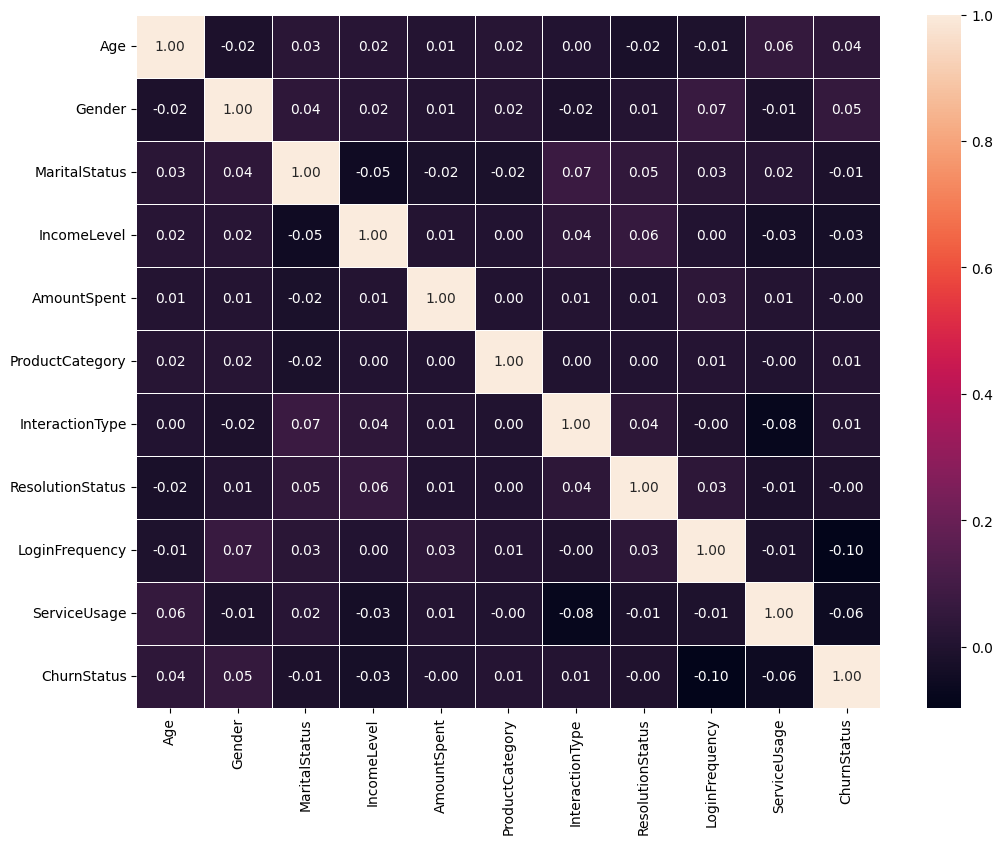

In [33]:
plt.figure(figsize=(12,9))
sns.heatmap(final_df.corr(),annot=True , linewidths=0.5 , fmt = '.2f' )


# Lets check for the outliers in our data

<Axes: xlabel='AmountSpent'>

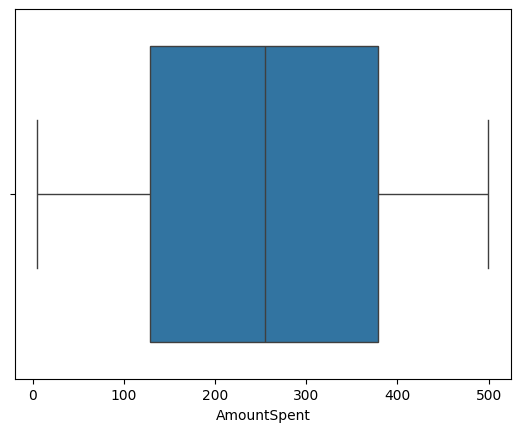

In [32]:
sns.boxplot(x = 'AmountSpent' ,data=final_df)

### Feature scaling of data

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
final_df['AmountSpent'] = sc.fit_transform(final_df[['AmountSpent']])

In [36]:
final_df['AmountSpent'].std()

1.0000960937877565

## **Feature selections on behalf of accuracy**

In [38]:
# lets try random forest
x = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1] # ot it can  be y = final_df['churn']

In [41]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
x_train.shape

(4163, 10)

In [43]:
y_train.shape

(4163,)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [47]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
y_pred = model.predict(x_test)

In [50]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[824   2]
 [ 11 204]]


In [51]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       826
           1       0.99      0.95      0.97       215

    accuracy                           0.99      1041
   macro avg       0.99      0.97      0.98      1041
weighted avg       0.99      0.99      0.99      1041



In [53]:
final_df.to_csv("cleaned_churn_dataset.csv", index=False)


In [56]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               5204 non-null   int64  
 1   Gender            5204 non-null   int64  
 2   MaritalStatus     5204 non-null   int64  
 3   IncomeLevel       5204 non-null   float64
 4   AmountSpent       5204 non-null   float64
 5   ProductCategory   5204 non-null   int64  
 6   InteractionType   5204 non-null   int64  
 7   ResolutionStatus  5204 non-null   int64  
 8   LoginFrequency    5204 non-null   int64  
 9   ServiceUsage      5204 non-null   int64  
 10  ChurnStatus       5204 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 447.3 KB


In [55]:
from google.colab import files
files.download("cleaned_churn_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>